In [95]:
import math

import numba
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%load_ext autoreload
%autoreload 2

# Project code
from bayesian_optimizer import BayesianOptimizer, AcquisitionFunc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Optimize a 1D Test function:

Iter: Init 1, Value: -0.001781979566900096, x: [0.]
Iter: Init 2, Value: 1.7434791024350744, x: [1.42857143]
Iter: Init 3, Value: 0.9310460212807445, x: [2.85714286]
Iter: Init 4, Value: 3.2927244278936794, x: [4.28571429]
Iter: Init 5, Value: 4.257074069893244, x: [5.71428571]
Iter: Init 6, Value: 3.776805952760947, x: [7.14285714]
Iter: Init 7, Value: 6.490379574098216, x: [8.57142857]
Iter: Init 8, Value: 6.659406771181556, x: [10.]
Iter: 1, Value: 7.076992941018489, x: [9.30009695]
Iter: 2, Value: 7.060062176016831, x: [9.1345767]
Iter: 3, Value: 7.082189601715138, x: [9.25550081]
Iter: 4, Value: 7.094916916792133, x: [9.24267144]
Iter: 5, Value: 6.95279949061499, x: [9.60814297]
Iter: 6, Value: 7.103282828669925, x: [9.22289429]
Iter: 7, Value: 5.405438279666953, x: [8.04205161]
Iter: 8, Value: 4.35158136365559, x: [5.04360967]
Iter: 9, Value: 7.055653981832286, x: [9.44159618]
Iter: 10, Value: 7.070353748535414, x: [9.20389855]
Iter: 11, Value: 6.888484972287663, x: [8.88741824]


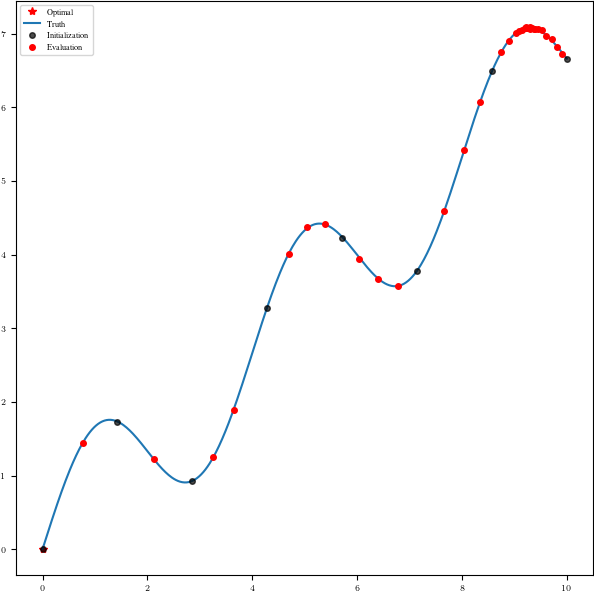

In [96]:
def test_function(x, sigma=0.01):
    # Add some noise to make this function hard to optimize
    noise = np.random.normal(loc=0, scale=sigma, size=x.shape)
    # return x**2 * np.sin(5 * np.pi * x)**6.0
    return 0.666 * x + np.sin(3.0/6.0 * np.pi * x) + noise


# Run the optimizer
bounds = [(0, 10)]
optimizer = BayesianOptimizer(
    lambda x1: test_function(x1), 35, 8, bounds, AcquisitionFunc.EI, debug=False)
optimal = optimizer.maximize()

# grid-based sample of the domain [0,1]
X = np.linspace(bounds[0][0], bounds[0][1], 500)
# sample the domain without noise
y = test_function(X, 0.0)
# sample the domain with noise
ynoise = test_function(X)
# Find best result
ix = np.argmin(y)

# Plot the function and data
fig = plt.figure(figsize=(6, 6))
# Plot the optimum
plt.plot(X[ix], y[ix], "*r", label="Optimal")
# plot the points without noise
plt.plot(X, y, label="Truth")
# Plot the optimzer's initialization points
opt_x_init = optimizer.x_init.reshape(-1, 1)
plt.plot(opt_x_init, test_function(opt_x_init), "ok", ms=4, alpha=0.7, label="Initialization")
# Plot the optimizer's evaluation points
opt_x = optimizer.x_eval.reshape(-1, 1)
plt.plot(opt_x, test_function(opt_x), "or", ms=4, alpha=1, label="Evaluation")
plt.legend()
plt.show()


## Optimize the Branin Hoo Function

In [97]:
@numba.jit
def branin_hoo_function(x1, x2):
    # SEE: https://statisticaloddsandends.wordpress.com/2019/06/24/test-functions-for-optimization-and-the-branin-hoo-function/
    a = 1
    b = 5.1 / (4 * math.pi**2)
    c = 5 / math.pi
    r = 6
    s = 10
    t = 1 / (8 * math.pi)
    return a * (x2 - b*x1**2 + c*x1 - r)**2 + s*(1-t)*math.cos(x1) + s


In [98]:
bounds = [(-5, 10), (0, 15)]
optimizer = BayesianOptimizer(
    lambda x1, x2: -1 * branin_hoo_function(x1, x2), 50, 5, bounds, AcquisitionFunc.EI, debug=False)
optimal = optimizer.maximize()

Iter: Init 1, Value: -308.12909601160663, x: [-5.  0.]
Iter: Init 2, Value: -32.75279624779229, x: [-1.25  3.75]
Iter: Init 3, Value: -24.129964413622268, x: [2.5 7.5]
Iter: Init 4, Value: -122.63788204211565, x: [ 6.25 11.25]
Iter: Init 5, Value: -145.87219087939556, x: [10. 15.]
Iter: 1, Value: -28.452915763092136, x: [4.58218173 5.85806839]
Iter: 2, Value: -14.001206646409276, x: [1.19637206 4.98036088]
Iter: 3, Value: -13.456064072281926, x: [-1.40756697  7.11932589]
Iter: 4, Value: -6.283119517471381, x: [8.49573621 0.37771689]
Iter: 5, Value: -1.9775739473396374, x: [10.          3.18851868]
Iter: 6, Value: -17.508299515778166, x: [-5. 15.]
Iter: 7, Value: -8.844570924370682, x: [-2.14301886 12.01500711]
Iter: 8, Value: -54.42160557669484, x: [-4.95708985 10.57577875]
Iter: 9, Value: -63.01015483224257, x: [-1.14705667 15.        ]
Iter: 10, Value: -18.202229907538012, x: [7.13210437 2.58291298]
Iter: 11, Value: -5.2040812241589265, x: [9.89314103 0.95621608]
Iter: 12, Value: -26

### Visualize the Branin Hoo Function

[49 62]
0.40307127299759316


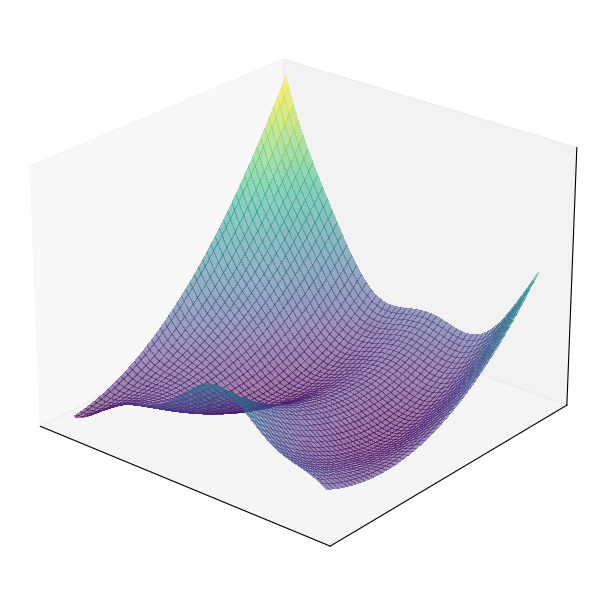

In [100]:
# def himmelblaus_function(x, y) -> float:
#     return (x**2 + y - 11)**2 + (x + y**2 - 7)**2  # Himmelblau's function


# x_axis = np.linspace(-5, 5, 1000)
# y_axis = np.linspace(-5, 5, 1000)
# XA, YA = np.meshgrid(x_axis, y_axis)
# vfunc = np.vectorize(himmelblaus_function)
# Z = vfunc(XA, YA)

x_axis = np.linspace(0, 15, 100)
y_axis = np.linspace(-5, 10, 100)
XA, YA = np.meshgrid(x_axis, y_axis)
vfunc = np.vectorize(branin_hoo_function)
Z = vfunc(XA, YA)


# Visualize the function as a surface plot
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(XA, YA, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False, alpha=0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(25, 130)

true_x_min = np.argwhere(Z == np.min(Z))[0]
print(true_x_min)
print(Z[true_x_min[0], true_x_min[1]])
